In [33]:
%store -r data
%store -r categories

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##  Pre-Procesar los Datos

In [35]:
# a fecha: trending_date , publish_time | yyyy-mm-dd 
# con hora: publish_time
# separar en 2 columnas float: geometry
# VERDADERO |	FALSO	boolean : ratings_disabled , comments_disabled , video_error_or_removed
# int : views
# eliminar ? : thumbnail_link , title , description
# describir categoria : category_id
# a categoría ?? : channel_title , state
# ??? tags

### Comprobación de datos faltantes

Comenzamos eliminando la columna "description" porque la data no nos servirá para el desarrollo del trabajo.

In [36]:
data.drop(columns=['description'], inplace=True)

#### Observación de datos faltantes

<AxesSubplot:>

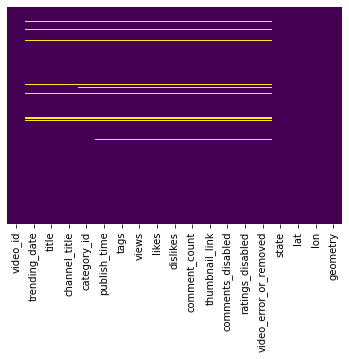

In [37]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [38]:
data[data.isnull().any(axis=1)]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,state,lat,lon,geometry
116,\nசசிகலா மூலம் போயஸ்கார்டனுக்குள் போய் அதிகாரம...,மகாதேவன்,டி.டி.வி.தினகரன்,பாஸ்கரன்,சுதாகரன்,ராஜராஜன்,குலோத்துங்கன்,டாக்டர்.வெங்கடேஷ் என பலருமே இப்போது ரெய்டு வள...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Delhi,28.669993,77.230004,POINT (77.23000403 28.6699929)
117,\nஇளவரசியின் மகன் விவேக் தலையெடுத்து இரண்டு ஆண...,அவர் சேர்த்து வைத்த பணமே கண்டமாகி விட்டது.சசி...,ஜெயலலிதாவின் ஹைதராபாத் திராட்சைத் தோட்டத்தைக்...,தனது மகள்கள்,மகனோடு போயஸ்தோட்டத்தில் தஞ்சமடைந்தார் இளவரசி. ...,புனேயில் எம்பிஏ முடித்து விட்டு பெங்களூருவில்...,2014ஆம் ஆண்டு அங்கிருந்து விலகினார்.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uttaranchal,30.320409,78.050006,POINT (78.05000565 30.32040895)
118,\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mizoram,23.710399,92.720015,POINT (92.72001461000001 23.71039899)
119,\n Ilavarasi's son Vivek is facing a severe cr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Goa,15.491997,73.818001,POINT (73.81800065 15.491997)
120,\n\nOneindia Tamil\nSubscribe for More Videos....,Support,Subscribe▬▬▬▬▬▬▬▬▬\n♥ subscribe :https://www....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Karnataka,12.570381,76.919997,POINT (76.91999711 12.57038129)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38255,Visit WWE.com: http://goo.gl/akf0J4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jharkhand,23.800393,86.419986,POINT (86.41998572 23.80039349)
38256,Must-See WWE videos on YouTube: https://goo.gl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West Bengal,22.580390,88.329947,POINT (88.32994665 22.58039044)
38480,Subscribe to WWE on YouTube: http://bit.ly/1i6...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Madhya Pradesh,21.300391,76.130019,POINT (76.13001949 21.30039105)
38481,Visit WWE.com: http://goo.gl/akf0J4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Delhi,28.669993,77.230004,POINT (77.23000403 28.6699929)


### Limpieza de datos repetidos

In [39]:
#Visualizacion de registros duplicados
data[data.duplicated(
    subset=["video_id","title","channel_title","trending_date","publish_time","views","likes"],
    keep=False)].sort_values(by=["video_id","title","channel_title","trending_date","publish_time","views","likes"])

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,state,lat,lon,geometry
38191,#NAME?,18.13.06,#DeepthiSunaina Cheema joke chepthe navvali..N...,Star Maa,24.0,2018-06-12T05:44:19.000Z,"comedy|""action""|""entertainment""|""telugu""|""toll...",675923.0,4642.0,908.0,920.0,https://i.ytimg.com/vi/-fKW38f_0Hk/default.jpg,FALSO,FALSO,FALSO,Kerala,8.900373,76.569993,POINT (76.56999263 8.900372741)
38314,#NAME?,18.13.06,#DeepthiSunaina Cheema joke chepthe navvali..N...,Star Maa,24.0,2018-06-12T05:44:19.000Z,"comedy|""action""|""entertainment""|""telugu""|""toll...",675923.0,4642.0,908.0,920.0,https://i.ytimg.com/vi/-fKW38f_0Hk/default.jpg,FALSO,FALSO,FALSO,Maharashtra,19.250232,73.160175,POINT (73.16017493 19.25023195)
38372,#NAME?,18.14.06,#DeepthiSunaina Cheema joke chepthe navvali..N...,Star Maa,24.0,2018-06-12T05:44:19.000Z,"comedy|""action""|""entertainment""|""telugu""|""toll...",1014376.0,5974.0,1414.0,1132.0,https://i.ytimg.com/vi/-fKW38f_0Hk/default.jpg,FALSO,FALSO,FALSO,Haryana,28.450006,77.019991,POINT (77.01999101 28.45000633)
38497,#NAME?,18.14.06,#DeepthiSunaina Cheema joke chepthe navvali..N...,Star Maa,24.0,2018-06-12T05:44:19.000Z,"comedy|""action""|""entertainment""|""telugu""|""toll...",1014376.0,5974.0,1414.0,1132.0,https://i.ytimg.com/vi/-fKW38f_0Hk/default.jpg,FALSO,FALSO,FALSO,Meghalaya,25.570492,91.880014,POINT (91.88001420000001 25.57049217)
33145,#NAME?,18.16.05,2018 Karnataka Election Results With Arnab Gos...,Republic World,25.0,2018-05-15T05:00:27.000Z,"karnataka elections 2018|""karnataka elections ...",333692.0,1316.0,408.0,157.0,https://i.ytimg.com/vi/-jYTsolMGUg/default.jpg,FALSO,FALSO,FALSO,Maharashtra,19.250232,73.160175,POINT (73.16017493 19.25023195)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chhattisgarh,22.090420,82.159987,POINT (82.15998734 22.09042035)
37925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West Bengal,22.580390,88.329947,POINT (88.32994665 22.58039044)
37928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tamil Nadu,12.920386,79.150042,POINT (79.15004187 12.92038576)
37931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sikkim,27.333330,88.616647,POINT (88.6166475 27.3333303)


Se observa que existen varios datos duplicados en el dataset. Se pasará a elminar los datos duplicados y nos quedaremos con el ultimo registro.

#### Eliminación de datos duplicados

In [40]:
data.drop_duplicates(
    subset=["video_id","title","channel_title","trending_date","publish_time"],
    keep="last", inplace=True)
    

Se utilizó como criterio para eleminar los datos duplicados por el "video_id", "title", "channel_title" y "publish_time". Esto se debe a que si presenta el mismo ID, mismo título y el mismo nombre del canal y misma hora y fecha de publicación se puede decir con seguridad que se trata del mismo video.

### Estandarización de tipo de datos

In [41]:
import datetime as dt

In [42]:
data['publish_time'] = pd.to_datetime(data['publish_time'],errors="coerce")

In [43]:
data['trending_date'] = pd.to_datetime(data['trending_date'],format="%y.%d.%m",errors="coerce")

In [44]:
#data['comments_disabled'].apply( vf_to_boolean )
data[['ratings_disabled','comments_disabled', 'video_error_or_removed']
] = data[['ratings_disabled','comments_disabled',
  'video_error_or_removed']].applymap(
  lambda x : True if x == 'VERDADERO' else False if x == 'FALSO'
  else np.NaN )

In [45]:
data[['ratings_disabled','comments_disabled', 'video_error_or_removed']] = data[['ratings_disabled','comments_disabled', 'video_error_or_removed']].astype("bool")

In [46]:
data['views'] = pd.to_numeric(data['views'],errors="coerce",downcast='integer')
data['category_id'] = pd.to_numeric(data['category_id'],errors="coerce",downcast='integer')
data[['views','likes','dislikes','comment_count','category_id']] = data[['views','likes','dislikes','comment_count','category_id']].astype('Int64')

In [47]:
categories['id'] = pd.to_numeric(categories['id'],errors="coerce",downcast='integer')
categories['id'] = categories['id'].astype('Int64')

In [48]:
# separar en 2 columnas float: geometry?

In [49]:
categories['snippet.title'] = categories['snippet.title'].astype("category")
categories['snippet.title']

0         Film & Animation
1         Autos & Vehicles
2                    Music
3           Pets & Animals
4                   Sports
5             Short Movies
6          Travel & Events
7                   Gaming
8            Videoblogging
9           People & Blogs
10                  Comedy
11           Entertainment
12         News & Politics
13           Howto & Style
14               Education
15    Science & Technology
16                  Movies
17         Anime/Animation
18        Action/Adventure
19                Classics
20                  Comedy
21             Documentary
22                   Drama
23                  Family
24                 Foreign
25                  Horror
26          Sci-Fi/Fantasy
27                Thriller
28                  Shorts
29                   Shows
30                Trailers
Name: snippet.title, dtype: category
Categories (30, object): ['Action/Adventure', 'Anime/Animation', 'Autos & Vehicles', 'Classics', ..., 'Thriller', 'Trailers', 

### Limpieza de datos NA

In [50]:
#Si el dato faltante es el video_id, entonces, se removerán dichas observaciones.

In [51]:
data.dropna(subset = ["video_id"], axis = 0, inplace = True)

#### Comprobamos datos nulos dentro del dataframe

In [52]:
data[data.isnull().any(axis=1)]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,state,lat,lon,geometry
116,\nசசிகலா மூலம் போயஸ்கார்டனுக்குள் போய் அதிகாரம...,NaT,டி.டி.வி.தினகரன்,பாஸ்கரன்,<NA>,NaT,குலோத்துங்கன்,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Delhi,28.669993,77.230004,POINT (77.23000403 28.6699929)
117,\nஇளவரசியின் மகன் விவேக் தலையெடுத்து இரண்டு ஆண...,NaT,ஜெயலலிதாவின் ஹைதராபாத் திராட்சைத் தோட்டத்தைக்...,தனது மகள்கள்,<NA>,NaT,2014ஆம் ஆண்டு அங்கிருந்து விலகினார்.,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Uttaranchal,30.320409,78.050006,POINT (78.05000565 30.32040895)
119,\n Ilavarasi's son Vivek is facing a severe cr...,NaT,NaN,NaN,<NA>,NaT,NaN,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Goa,15.491997,73.818001,POINT (73.81800065 15.491997)
586,\nഇന്ത്യന്‍ സിനിമാ ആരാധകരെ മുഴുവന്‍ കോരിത്തരിപ...,NaT,Support,Subscribe▬▬▬▬▬▬▬▬▬\n♥ subscribe : https://goo...,<NA>,NaT,NaN,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Lakshadweep,10.562573,72.636867,POINT (72.63686717 10.56257331)
959,\nஜெயலலிதா உயிருடன் இருந்த போது அவருடனேயே இருந...,NaT,கிருஷ்ணப்ரியா,விவேக் 3 பேருமே போயஸ் கார்டனில் வளர்ந்தவர்கள்...,<NA>,NaT,NaN,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Sikkim,27.333330,88.616647,POINT (88.6166475 27.3333303)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37935,Current affairs playlist-,NaT,NaN,NaN,<NA>,NaT,NaN,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Tripura,23.835404,91.279999,POINT (91.27999914 23.83540428)
37936,https://www.youtube.com/watch?v=ZFy9-nslWQk&li...,NaT,NaN,NaN,<NA>,NaT,NaN,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Maharashtra,19.250232,73.160175,POINT (73.16017493 19.25023195)
38480,Subscribe to WWE on YouTube: http://bit.ly/1i6...,NaT,NaN,NaN,<NA>,NaT,NaN,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Madhya Pradesh,21.300391,76.130019,POINT (76.13001949 21.30039105)
38481,Visit WWE.com: http://goo.gl/akf0J4,NaT,NaN,NaN,<NA>,NaT,NaN,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Delhi,28.669993,77.230004,POINT (77.23000403 28.6699929)


In [53]:
data[data.isnull().any(axis=1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 116 to 38482
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                231 non-null    object             
 1   trending_date           0 non-null      datetime64[ns]     
 2   title                   72 non-null     object             
 3   channel_title           35 non-null     object             
 4   category_id             0 non-null      Int64              
 5   publish_time            0 non-null      datetime64[ns, UTC]
 6   tags                    8 non-null      object             
 7   views                   0 non-null      Int64              
 8   likes                   0 non-null      Int64              
 9   dislikes                0 non-null      Int64              
 10  comment_count           0 non-null      Int64              
 11  thumbnail_link          0 non-null      o

Por ultimo eliminamos los datos que tengan NA en "publish_time" y "trending_date"

In [54]:
data.dropna(subset=["publish_time","trending_date"],inplace=True)

In [55]:
data[data.isnull().any(axis=1)]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,state,lat,lon,geometry


### Datos procesados

In [56]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,state,lat,lon,geometry
0,kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12 12:20:39+00:00,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878)
1,zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13 05:43:56+00:00,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878)
2,10L1hZ9qa58,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12 15:48:08+00:00,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Dadra And Nagar Haveli,20.266578,73.016618,POINT (73.01661780000001 20.26657819)
3,N1vE8iiEg64,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12 07:08:48+00:00,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,Nagaland,25.666998,94.116570,POINT (94.11657019 25.6669979)
4,kJzGH0PVQHQ,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13 01:14:16+00:00,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,Himachal Pradesh,31.100025,77.166597,POINT (77.16659704 31.10002545)


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32706 entries, 0 to 38532
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                32706 non-null  object             
 1   trending_date           32706 non-null  datetime64[ns]     
 2   title                   32706 non-null  object             
 3   channel_title           32706 non-null  object             
 4   category_id             32706 non-null  Int64              
 5   publish_time            32706 non-null  datetime64[ns, UTC]
 6   tags                    32706 non-null  object             
 7   views                   32706 non-null  Int64              
 8   likes                   32706 non-null  Int64              
 9   dislikes                32706 non-null  Int64              
 10  comment_count           32706 non-null  Int64              
 11  thumbnail_link          32706 non-null  o

In [58]:
data.describe()

,category_id,views,likes,dislikes,comment_count,lat,lon
count,32706.000000,3.270600e+04,3.270600e+04,3.270600e+04,32706.000000,32706.000000,32706.000000
mean,21.667370,9.617442e+05,2.425809e+04,1.524596e+03,2411.737632,22.667941,82.112694
std,6.466283,3.075813e+06,9.351082e+04,1.695333e+04,14660.130634,6.818604,7.445930
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,8.900373,72.636867
25%,23.000000,1.115985e+05,7.760000e+02,9.600000e+01,70.000000,19.250232,76.569993
50%,24.000000,2.706680e+05,2.690000e+03,2.830000e+02,290.000000,23.835404,78.570026
75%,24.000000,7.134440e+05,1.148900e+04,9.030000e+02,1125.000000,27.333330,88.616647
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,34.299959,94.216667


In [59]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   kind                31 non-null     object  
 1   etag                31 non-null     object  
 2   id                  31 non-null     Int64   
 3   snippet.channelId   31 non-null     object  
 4   snippet.title       31 non-null     category
 5   snippet.assignable  31 non-null     bool    
dtypes: Int64(1), bool(1), category(1), object(3)
memory usage: 2.5+ KB


In [60]:
%store data
%store categories

Stored 'data' (DataFrame)
Stored 'categories' (DataFrame)
